In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")

In [ ]:
data=df.copy()
data.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [ ]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [ ]:
data["Datetime"]=pd.to_datetime(data["Datetime"],format="%m/%d/%Y %H:%M")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [ ]:
data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
 data["Datetime"]=data["Datetime"].values.astype(float)

In [ ]:
# Conver to DateTime to Unix timestamp for the fit model
# Assuming 'Datetime' is currently a string representation of a datetime
data["Datetime"] = pd.to_datetime(data["Datetime"])  # Convert to datetime objects
data["Datetime"] = data["Datetime"].apply(lambda x: x.timestamp())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  float64
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Set the DateTime column as the index
# data['DateTime'] = pd.to_datetime(data['DateTime'])
# data.set_index('DateTime', inplace=True)

# Remove unnecessary columns
data = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and test sets
train_size = int(len(data_scaled) * 0.7)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Create input sequences for LSTM
def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length])
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create an LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, data.shape[1])))
model.add(Dense(data.shape[1]))  # Output layer size should match the number of features

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Predict future values
future_data = data_scaled[-seq_length:]  # Example: take the last seq_length data points
future_data = future_data.reshape((1, seq_length, data.shape[1]))
predicted_data = model.predict(future_data)

# Convert predicted values back to the original scale
predicted_data = scaler.inverse_transform(predicted_data)
print(f'Predicted value: {predicted_data}')


Epoch 1/10
1147/1147 [==============================] - 12s 8ms/step - loss: 0.0042
Epoch 2/10
1147/1147 [==============================] - 8s 7ms/step - loss: 9.6786e-04
Epoch 3/10
1147/1147 [==============================] - 9s 8ms/step - loss: 8.1492e-04
Epoch 4/10
1147/1147 [==============================] - 8s 7ms/step - loss: 7.4661e-04
Epoch 5/10
1147/1147 [==============================] - 9s 8ms/step - loss: 7.1344e-04
Epoch 6/10
1147/1147 [==============================] - 9s 8ms/step - loss: 6.9253e-04
Epoch 7/10
1147/1147 [==============================] - 8s 7ms/step - loss: 6.8200e-04
Epoch 8/10
1147/1147 [==============================] - 9s 8ms/step - loss: 6.6808e-04
Epoch 9/10
1147/1147 [==============================] - 8s 7ms/step - loss: 6.5957e-04
Epoch 10/10
1147/1147 [==============================] - 10s 9ms/step - loss: 6.5363e-04
Train Loss: 0.0006358062964864075, Test Loss: 0.0006337339291349053
1/1 [==============================] - 1s 716ms/step
Predicted 

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")

# Set the DateTime column as the index
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%m/%d/%Y %H:%M")
data.set_index('Datetime', inplace=True)

# Remove unnecessary columns
data = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create input sequences for LSTM
def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length])
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps
X, y = create_sequences(data_scaled, seq_length)

# Create an LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, data.shape[1])))
model.add(Dense(data.shape[1]))  # Output layer size should match the number of features

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X, y, epochs=12, batch_size=32)

# Prepare data for future predictions
last_data = data_scaled[-seq_length:]
future_data = np.array([last_data])

# Predict future values
predicted_data = []
num_predictions = 288  # For a week's worth of predictions (7 days)

for _ in range(num_predictions):
    prediction = model.predict(future_data)
    predicted_data.append(prediction)
    future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, data.shape[1]), axis=1)

# Convert predicted values back to the original scale
predicted_data = np.array(predicted_data).reshape((num_predictions, data.shape[1]))
predicted_data = scaler.inverse_transform(predicted_data)

# Create a DataFrame to display predicted values
prediction_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=10), periods=num_predictions, freq='10min')
prediction_df = pd.DataFrame(predicted_data, columns=data.columns, index=prediction_dates)
prediction_df.insert(0, 'Datetime', prediction_dates)
prediction_df.reset_index(drop=True, inplace=True)
print(prediction_df)

# Prepare predicted values for evaluation (similar to X and y datasets)
predicted_values_X, predicted_values_y = create_sequences(predicted_data, seq_length)

# Reshape predicted values to match the expected input shape for the model
predicted_values_X = np.reshape(predicted_values_X, (predicted_values_X.shape[0], seq_length, data.shape[1]))

# Calculate the model score
score = model.evaluate(predicted_values_X, predicted_values_y)
print("Model Score:", score)


Epoch 1/12
1638/1638 [==============================] - 16s 7ms/step - loss: 0.0033
Epoch 2/12
1638/1638 [==============================] - 13s 8ms/step - loss: 9.3110e-04
Epoch 3/12
1638/1638 [==============================] - 13s 8ms/step - loss: 8.0505e-04
Epoch 4/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.6142e-04
Epoch 5/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.3636e-04
Epoch 6/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.2145e-04
Epoch 7/12
1638/1638 [==============================] - 12s 7ms/step - loss: 7.1030e-04
Epoch 8/12
1638/1638 [==============================] - 12s 8ms/step - loss: 7.0767e-04
Epoch 9/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.0218e-04
Epoch 10/12
1638/1638 [==============================] - 13s 8ms/step - loss: 6.9396e-04
Epoch 11/12
1638/1638 [==============================] - 13s 8ms/step - loss: 6.9056e-04
Epoch 12/12
1/1 [=================

R^2 score: 0.9515536373284097
Mean Squared Error (MSE): 2100404.074555396
Mean Absolute Error (MAE): 876.8314187434148


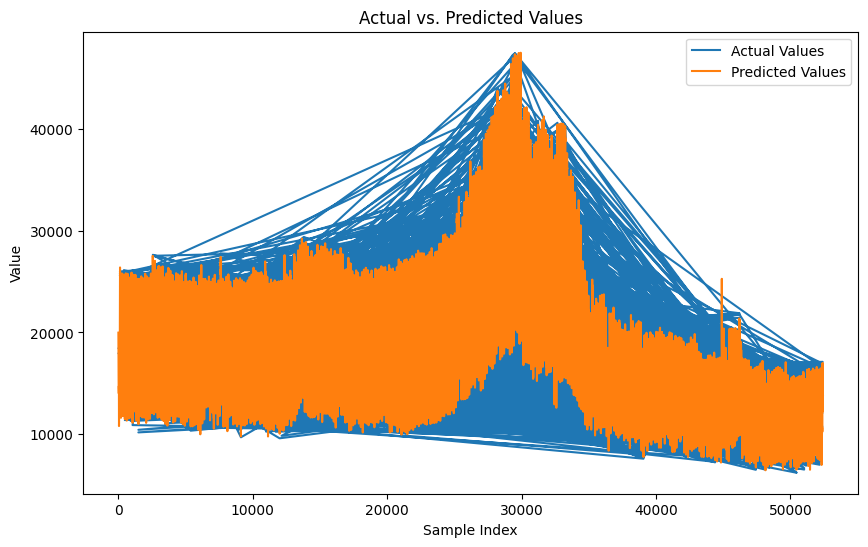

In [ ]:
import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%m/%d/%Y %H:%M")

# Convert the 'Datetime' column to a numerical representation (e.g., Unix timestamp)
data["Datetime"] = data["Datetime"].apply(lambda x: x.timestamp())

X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Save the model
joblib.dump(rf_model, "rf_model.joblib")

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Random forest algorithm

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = rf_model.predict(X_new)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
prediction_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Datetime             288 non-null    datetime64[ns]
 1   Temperature          288 non-null    float32       
 2   Humidity             288 non-null    float32       
 3   WindSpeed            288 non-null    float32       
 4   GeneralDiffuseFlows  288 non-null    float32       
 5   DiffuseFlows         288 non-null    float32       
dtypes: datetime64[ns](1), float32(5)
memory usage: 8.0 KB


         Datetime  Temperature    Humidity  WindSpeed  GeneralDiffuseFlows  \
0    1.514678e+18     6.434704   74.838020   0.076044            -2.702182   
1    1.514679e+18     6.302684   75.468781   0.070951            -4.517146   
2    1.514680e+18     6.174408   76.082237   0.065124            -6.266359   
3    1.514680e+18     6.047999   76.689857   0.058764            -7.976188   
4    1.514681e+18     5.923086   77.297340   0.051613            -9.605433   
..            ...          ...         ...        ...                  ...   
283  1.514848e+18    22.518866  119.606422  -0.385021           502.020142   
284  1.514849e+18    22.589516  119.643379  -0.365627           501.948517   
285  1.514849e+18    22.660215  119.680336  -0.346124           501.871094   
286  1.514850e+18    22.730961  119.717316  -0.326512           501.787842   
287  1.514851e+18    22.801750  119.754311  -0.306791           501.698517   

     DiffuseFlows  PowerConsumption_Zone3  
0        3.029858  

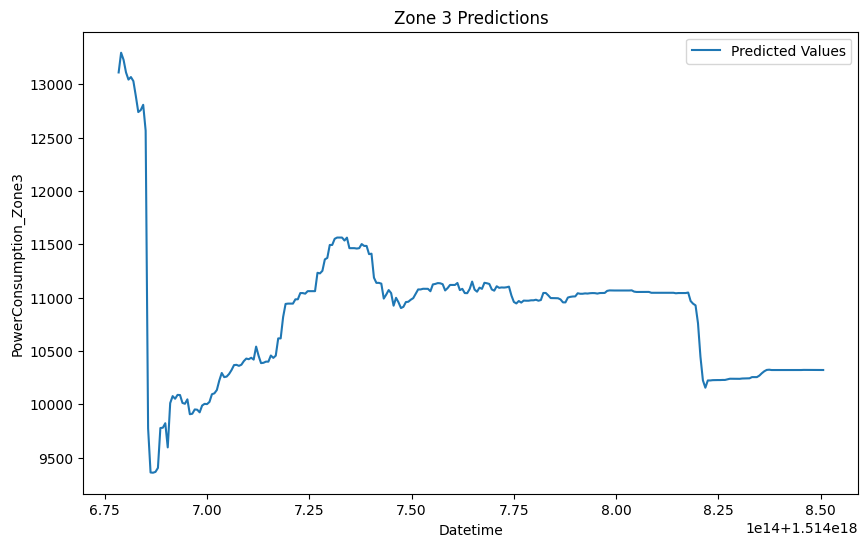

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the trained model
rf_model = joblib.load('rf_model.joblib')

# Prepare the data for prediction
a = prediction_df
a["Datetime"] = a["Datetime"].values.astype(float)

# Adapt the column names expected by the model to the predicted dataset
column_names = ['Datetime', 'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone3']
new_data = pd.DataFrame(columns=column_names)

# Predict Zone 1 Power Consumption values
zone3_pred = rf_model.predict(a)

# Add the predicted values to the new_data DataFrame
new_data['Datetime'] = a['Datetime']
new_data['Temperature'] = a['Temperature']
new_data['Humidity'] = a['Humidity']
new_data['WindSpeed'] = a['WindSpeed']
new_data['GeneralDiffuseFlows'] = a['GeneralDiffuseFlows']
new_data['DiffuseFlows'] = a['DiffuseFlows']
new_data['PowerConsumption_Zone3'] = zone3_pred

# Print the predicted values
print(new_data)

# Save the predicted values to an Excel file
new_data.to_excel('predictions.xlsx', index=False)

# Plot the predicted values on a graph
plt.figure(figsize=(10, 6))
plt.plot(new_data['Datetime'], new_data['PowerConsumption_Zone3'], label='Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('PowerConsumption_Zone3')
plt.title('Zone 3 Predictions')
plt.legend()
plt.show()


In [ ]:
# X = X.astype({'Datetime': 'datetime64[ns]'})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime             52416 non-null  float64
 1   Temperature          52416 non-null  float64
 2   Humidity             52416 non-null  float64
 3   WindSpeed            52416 non-null  float64
 4   GeneralDiffuseFlows  52416 non-null  float64
 5   DiffuseFlows         52416 non-null  float64
dtypes: float64(6)
memory usage: 2.4 MB


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

# Separate independent variables and target variable
X = data[['Datetime']]
X = X.astype({'Datetime': 'datetime64[ns]'})
y_temp = data['Temperature']
y_humidity = data['Humidity']
y_wind = data['WindSpeed']
y_general = data['GeneralDiffuseFlows']
y_diffuse = data['DiffuseFlows']

# Split the data into training and testing sets
X_train, X_test, y_temp_train, y_temp_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)
X_train, X_test, y_humidity_train, y_humidity_test = train_test_split(X, y_humidity, test_size=0.2, random_state=42)
X_train, X_test, y_wind_train, y_wind_test = train_test_split(X, y_wind, test_size=0.2, random_state=42)
X_train, X_test, y_general_train, y_general_test = train_test_split(X, y_general, test_size=0.2, random_state=42)
X_train, X_test, y_diffuse_train, y_diffuse_test = train_test_split(X, y_diffuse, test_size=0.2, random_state=42)

# Create and train Random Forest Regression models
model_temp = RandomForestRegressor()
model_temp.fit(X_train, y_temp_train)

model_humidity = RandomForestRegressor()
model_humidity.fit(X_train, y_humidity_train)

model_wind = RandomForestRegressor()
model_wind.fit(X_train, y_wind_train)

model_general = RandomForestRegressor()
model_general.fit(X_train, y_general_train)

model_diffuse = RandomForestRegressor()
model_diffuse.fit(X_train, y_diffuse_train)

# Save the models
joblib.dump(model_temp, 'temp_model.joblib')
joblib.dump(model_humidity, 'humidity_model.joblib')
joblib.dump(model_wind, 'wind_model.joblib')
joblib.dump(model_general, 'general_model.joblib')
joblib.dump(model_diffuse, 'diffuse_model.joblib')

# Make predictions
y_temp_pred = model_temp.predict(X_test)
y_humidity_pred = model_humidity.predict(X_test)
y_wind_pred = model_wind.predict(X_test)
y_general_pred = model_general.predict(X_test)
y_diffuse_pred = model_diffuse.predict(X_test)

# Evaluate prediction performance
mse_temp = mean_squared_error(y_temp_test, y_temp_pred)
mse_humidity = mean_squared_error(y_humidity_test, y_humidity_pred)
mse_wind = mean_squared_error(y_wind_test, y_wind_pred)
mse_general = mean_squared_error(y_general_test, y_general_pred)
mse_diffuse = mean_squared_error(y_diffuse_test, y_diffuse_pred)

# Create a DataFrame to store predictions
predictions = pd.DataFrame({
    "Datetime": X_test["Datetime"],
    "Predicted Temperature": y_temp_pred,
    "Predicted Humidity": y_humidity_pred,
    "Predicted WindSpeed": y_wind_pred,
    "Predicted General Diffuse Flows": y_general_pred,
    "Predicted Diffuse Flows": y_diffuse_pred
})

# Save predictions to an Excel file
predictions.to_excel("predictions.xlsx", index=False)


In [ ]:
new_data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone3
0,1.514678e+18,6.434704,74.838020,0.076044,-2.702182,3.029858,13111.961284
1,1.514679e+18,6.302684,75.468781,0.070951,-4.517146,6.842075,13296.926343
2,1.514680e+18,6.174408,76.082237,0.065124,-6.266359,11.109895,13230.659836
3,1.514680e+18,6.047999,76.689857,0.058764,-7.976188,15.805232,13112.240097
4,1.514681e+18,5.923086,77.297340,0.051613,-9.605433,20.878761,13044.993998
...,...,...,...,...,...,...,...
283,1.514848e+18,22.518866,119.606422,-0.385021,502.020142,168.698044,10322.434747
284,1.514849e+18,22.589516,119.643379,-0.365627,501.948517,167.981934,10322.434747
285,1.514849e+18,22.660215,119.680336,-0.346124,501.871094,167.264465,10322.434747
286,1.514850e+18,22.730961,119.717316,-0.326512,501.787842,166.545807,10321.451615


In [ ]:
import joblib
import pandas as pd

# Load the trained model
rf_model = joblib.load("rf_model.joblib")

# Prepare the new data for prediction (next week's data)
new_data = pd.DataFrame({
    "Datetime": pd.date_range(start='2023-06-11', periods=7, freq='D'),
    "Temperature": [25.5, 26.1, 24.8, 25.3, 24.7, 23.9, 24.5],
    "Humidity": [60, 55, 62, 57, 63, 58, 59],
    "WindSpeed": [10, 12, 8, 11, 9, 10, 11],
    "GeneralDiffuseFlows": [80, 85, 90, 88, 86, 82, 84],
    "DiffuseFlows": [100, 110, 95, 105, 98, 102, 99]
})

# Convert DateTime to Unix timestamp
X_new = new_data.copy()
X_new["Datetime"] = pd.to_datetime(X_new["Datetime"]).astype(int) // 10**9

# Make predictions for Zone 1 Power Consumption
y_pred = rf_model.predict(X_new)

# Add the predicted values to the new_data DataFrame
new_data["PowerConsumption_Zone3"] = y_pred

# Print the predicted values for Zone 1 Power Consumption
print("Predicted Zone 3 Power Consumption Values:")
print(new_data["PowerConsumption_Zone3"])

# Save predictions to an Excel file
new_data.to_excel("predictions.xlsx", index=False)


Predicted Zone 3 Power Consumption Values:
0    15072.544173
1    14546.585505
2    13646.899148
3    14434.032148
4    14583.196579
5    15006.800658
6    14735.636249
Name: PowerConsumption_Zone3, dtype: float64


R^2 score: 0.4783791657104901
Mean Squared Error (MSE): 22745027.948891986
Mean Absolute Error (MAE): 3818.792670813367


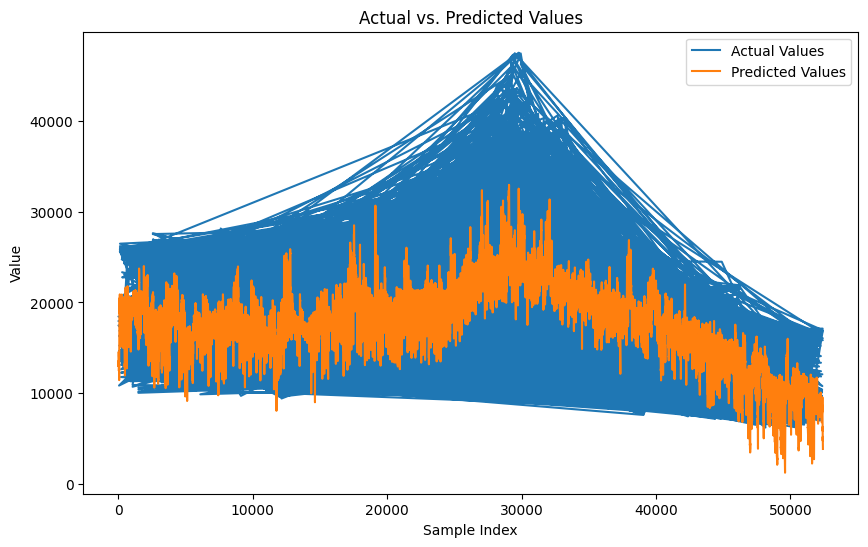

In [ ]:
# Linear Regression algorithm

from sklearn.linear_model import LinearRegression
# Linear
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = lr_model.predict(X_new)

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


R^2 score: -0.05170171967810977
Mean Squared Error (MSE): 45858952.395102665
Mean Absolute Error (MAE): 5030.638180049882


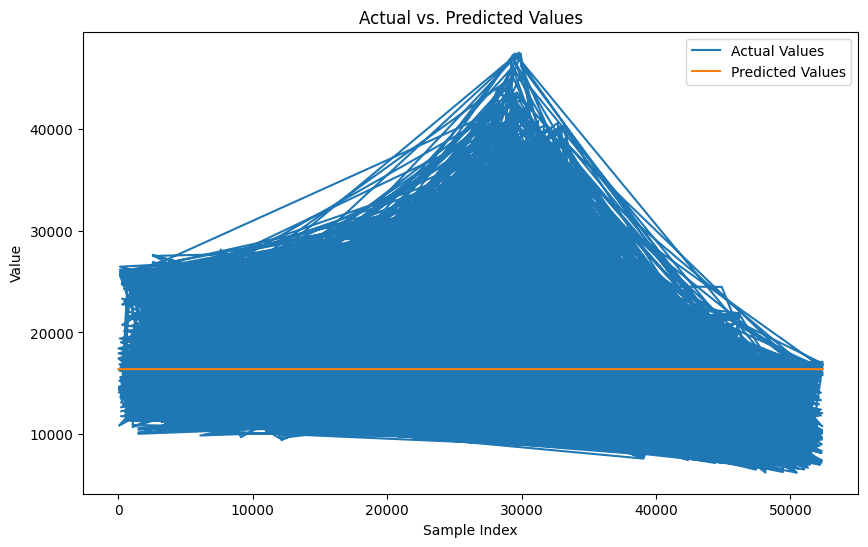

In [ ]:
from sklearn.svm import SVR
# Support Vector
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the support vector regression model
svr_model = SVR()

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = svr_model.predict(X_new)

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


R^2 score: 0.8786288368774322
Mean Squared Error (MSE): 5292331.739725238
Mean Absolute Error (MAE): 1089.3195159152995


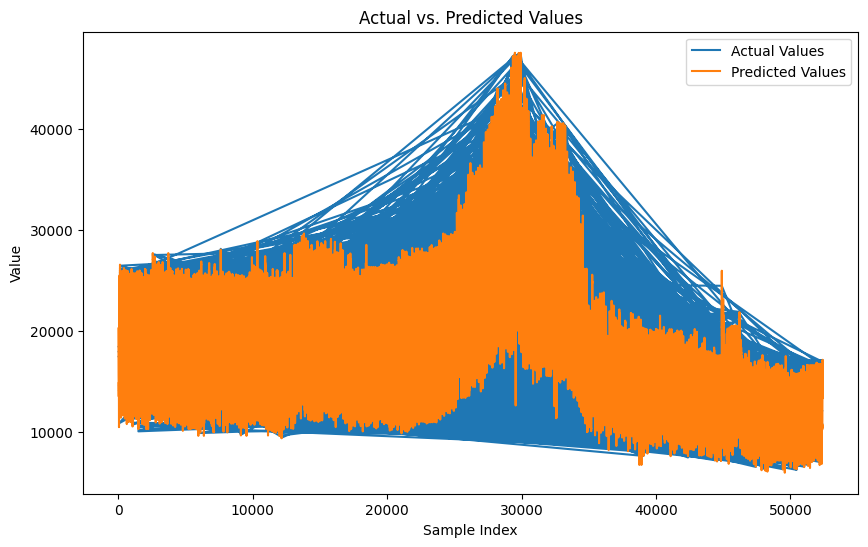

In [ ]:
# Decision Trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
dt_model = DecisionTreeRegressor()

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = dt_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradiant
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the gradient boosting regressor
gb_model = GradientBoostingRegressor()

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


R^2 score: 0.7170849473441685
Mean Squared Error (MSE): 12336376.073981034
Mean Absolute Error (MAE): 2639.2429875211724


R^2 score: 0.9963379711583642
Mean Squared Error (MSE): 159681.0228374161
Mean Absolute Error (MAE): 238.87106944534526


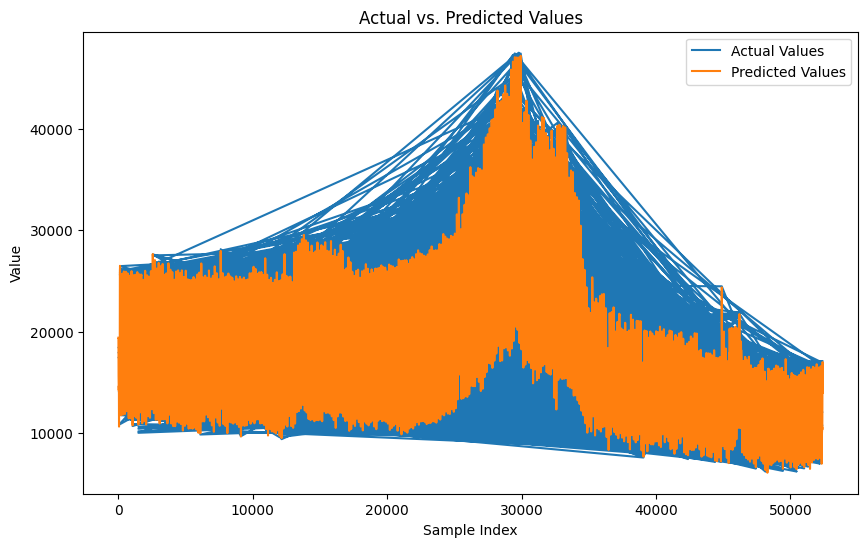

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# K-Nearest Neighbors
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors regressor
knn_model = KNeighborsRegressor()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Save the model
joblib.dump(knn_model, "knn_model.joblib")

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = knn_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import joblib
from datetime import datetime, timedelta

# Load the trained model
knn_model = joblib.load("knn_model.joblib")  # Update the filename with the actual trained model

# Define the target date and the number of days for prediction
target_date = np.datetime64("2023-06-06")
num_days = 7

# Create a new DataFrame for prediction
new_data = pd.DataFrame(columns=["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"])

# Fill in data for prediction
for i in range(num_days):
    new_row = pd.DataFrame({
        "Datetime": [target_date + np.timedelta64(i, 'D')],
        "Temperature": [20],  # Specify other features you want to predict here
        "Humidity": [17],
        "WindSpeed": [10],
        "GeneralDiffuseFlows": [20],
        "DiffuseFlows": [15]
    })
    new_data = pd.concat([new_data, new_row], ignore_index=True)

new_data['Datetime'] = new_data['Datetime'].astype('int64') // 10**9

# Make predictions using the modified new_data
predictions = knn_model.predict(new_data)

# Print prediction results
for i in range(num_days):
    date = target_date + np.timedelta64(i, 'D')
    prediction = predictions[i]
    print(f"Date: {date}, Prediction: {prediction}")


Date: 2023-06-06, Prediction: 13974.741894
Date: 2023-06-07, Prediction: 13974.741894
Date: 2023-06-08, Prediction: 13974.741894
Date: 2023-06-09, Prediction: 13974.741894
Date: 2023-06-10, Prediction: 13974.741894
Date: 2023-06-11, Prediction: 13974.741894
Date: 2023-06-12, Prediction: 13974.741894


In [ ]:
joblib.dump({'model': knn_model, 'X_train': X_train, 'y_train': y_train}, "knn_model.joblib")

# When loading the model:
loaded_data = joblib.load("knn_model.joblib") # Removed extra space here
knn_model = loaded_data['model']
X_train = loaded_data['X_train']
y_train = loaded_data['y_train']

print("Training Features (X_train):\n", X_train)
print("\nTraining Target (y_train):\n", y_train)

Training Features (X_train):
            Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
26890  1.499363e+09        30.17     52.03      4.926              432.100   
36038  1.504852e+09        19.37     90.60      0.307                0.073   
27335  1.499630e+09        29.97     33.98      4.916               70.700   
9666   1.489028e+09        12.34     85.30      0.076                0.055   
1977   1.484415e+09        18.10     62.42      0.089               73.800   
...             ...          ...       ...        ...                  ...   
11284  1.489999e+09        10.48     89.90      0.082               42.590   
44732  1.510068e+09        21.60     63.44      0.076              410.800   
38158  1.506124e+09        22.98     50.05      4.922                0.088   
860    1.483745e+09        12.37     76.40      0.085                0.055   
15795  1.492706e+09        16.44     84.60      0.072               52.850   

       DiffuseFlows  
26890      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import joblib
from datetime import datetime

# Load the trained model
knn_model = joblib.load("knn_model.joblib") 2
knn_model = loaded_data['model']

# Get input data from the user
target_date = input("Target Date (in YYYY-MM-DD format): ")
temperature = float(input("Temperature value: "))
humidity = float(input("Humidity value: "))
wind_speed = float(input("Wind Speed value: "))
general_diffuse_flows = float(input("General Diffuse Flows value: "))
diffuse_flows = float(input("Diffuse Flows value: "))

# Convert the target date to the appropriate data type
target_date = np.datetime64(target_date)

# Create new data for prediction
new_data = pd.DataFrame({
    "Datetime": [target_date],
    "Temperature": [temperature],
    "Humidity": [humidity],
    "WindSpeed": [wind_speed],
    "GeneralDiffuseFlows": [general_diffuse_flows],
    "DiffuseFlows": [diffuse_flows]
})

new_data['Datetime'] = new_data['Datetime'].astype('int64') // 10**9
# Make predictions
prediction = knn_model.predict(new_data)

print("Target Date:", target_date.astype(str))
print("Predicted Zone 3 Power Consumption:", prediction)


Target Date (in YYYY-MM-DD format): 2023-02-05
Temperature value: 20
Humidity value: 0
Wind Speed value: 20
General Diffuse Flows value: 20
Diffuse Flows value: 20
Target Date: 2023-02-05
Predicted Zone 3 Power Consumption: [13974.741894]


In [ ]:
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPRegressor

# Initialize the Multi-Layer Perceptron regressor
mlp_model = MLPRegressor()

# Train the model on the training data
mlp_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp_model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


R^2 score: -0.03569799024489262
Mean Squared Error (MSE): 45161117.39826855
Mean Absolute Error (MAE): 5497.030810512996


In [ ]:
# Linear Support Vectors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import LinearSVR

# Initialize the Linear Support Vector Regressor
svm_model = LinearSVR()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R^2 score: -7.346036964512299
Mean Squared Error (MSE): 363924965.30335677
Mean Absolute Error (MAE): 17897.49819838325


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.linear_model import ElasticNet # ElastikNet

X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ElasticNet regressor
en_model = ElasticNet()

# Train the model on the training data
en_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = en_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



R^2 score: 0.47838430493499495
Mean Squared Error (MSE): 22744803.855456073
Mean Absolute Error (MAE): 3815.2961754682765


In [ ]:
import xgboost as xgb # XGBoost


# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model on the training data
xgb_model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



R^2 score: 0.7602959554245072
Mean Squared Error (MSE): 10452180.654858625
Mean Absolute Error (MAE): 2390.11469846655


In [ ]:
import lightgbm as lgb # LightGBM


# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to Dataset format
train_data = lgb.Dataset(X_train, label=y_train)

# Set the parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse'
}

# Train the model on the training data
lgb_model = lgb.train(params, train_data)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 41932, number of used features: 6
[LightGBM] [Info] Start training from score 17819.881744
R^2 score: 0.8262525388662745
Mean Squared Error (MSE): 7576175.259407362
Mean Absolute Error (MAE): 2033.1483051855523


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error: ", mse)

Mean squared error:  330694.30690528895


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  float64
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = joblib.load("rf_model.joblib")

# Extract the features from the new data
X_new = data[["Datetime","Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows","DiffuseFlows"]]

# Make predictions on the new data
y_pred = rf_model.predict(X_new)

# Print the predicted power consumption values
print(y_pred)

[19979.2192798  19937.9277124  19644.4337329  ... 13704.85753929
 13705.3541395  13729.9015598 ]


In [ ]:
y_pred

array([19979.2192798 , 19937.9277124 , 19644.4337329 , ...,
       13704.85753929, 13705.3541395 , 13729.9015598 ])

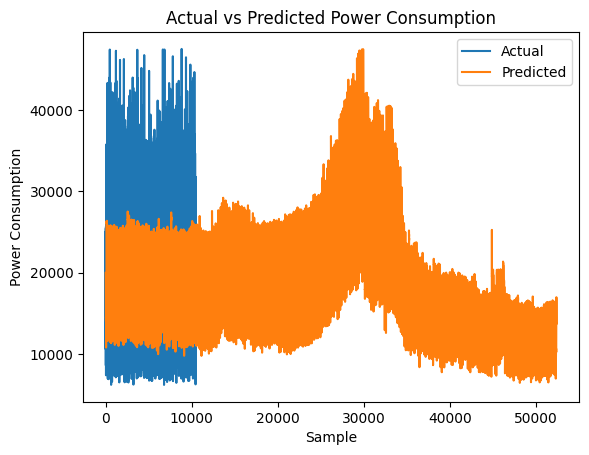

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted Power Consumption')

# Add legend
plt.legend()

# Show the plot
plt.show()